In [1]:
import pandas as pd

# Charger le dataset (adapter le chemin)
df = pd.read_csv("2014-2015-doe-high-school-directory.csv")

# Aperçu
df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [2]:
# Nettoyer noms de colonnes
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)

df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [3]:
brooklyn_df = df[df['borough'] == "BROOKLYN"]

# Aperçu
brooklyn_df.shape, brooklyn_df.head()


((0, 69),
 Empty DataFrame
 Columns: [dbn, school_name, borough, building_code, phone_number, fax_number, grade_span_min, grade_span_max, expgrade_span_min, expgrade_span_max, bus, subway, primary_address_line_1, city, state_code, postcode, website, total_students, campus_name, school_type, overview_paragraph, program_highlights, language_classes, advancedplacement_courses, online_ap_courses, online_language_courses, extracurricular_activities, psal_sports_boys, psal_sports_girls, psal_sports_coed, school_sports, partner_cbo, partner_hospital, partner_highered, partner_cultural, partner_nonprofit, partner_corporate, partner_financial, partner_other, addtl_info1, addtl_info2, start_time, end_time, se_services, ell_programs, school_accessibility_description, number_programs, priority01, priority02, priority03, priority04, priority05, priority06, priority07, priority08, priority09, priority10, location_1, community_board, council_district, census_tract, bin, bbl, nta, zip_codes, community

In [4]:
brooklyn_school_count = brooklyn_df['dbn'].nunique()
print("Total unique schools in Brooklyn:", brooklyn_school_count)


Total unique schools in Brooklyn: 0


In [5]:
unique_school_count = brooklyn_df["dbn"].nunique()
print(unique_school_count)

0


In [6]:
# Filtrer les écoles où grade_span_max >= 9
brooklyn_grade9 = brooklyn_df[brooklyn_df['grade_span_max'] >= 9]['dbn'].nunique()
print("Schools in Brooklyn offering Grade 9 entry:", brooklyn_grade9)


Schools in Brooklyn offering Grade 9 entry: 0


In [8]:
brooklyn_school_count = brooklyn_df['borough'].nunique()
print("Total unique schools in Brooklyn:", brooklyn_school_count)


Total unique schools in Brooklyn: 0


In [9]:
brooklyn_school_count = brooklyn_df['dbn'].nunique()
print("Total unique schools in Brooklyn:", brooklyn_school_count)


Total unique schools in Brooklyn: 0


In [10]:
print(df['borough'].unique())


['Queens' 'Brooklyn' 'Bronx' 'Manhattan' 'Staten Island']


First question: Total schools in Brooklyn

In [11]:
brooklyn_df = df[df['borough'] == "Brooklyn"]

brooklyn_school_count = brooklyn_df['dbn'].nunique()
print("Total unique schools in Brooklyn:", brooklyn_school_count)


Total unique schools in Brooklyn: 121


QUESTION 1 : ANSWER 121

second question : Schools in Brooklyn that offer Grade 9 entry

In [12]:
brooklyn_grade9 = brooklyn_df[brooklyn_df['grade_span_max'] >= 9]['dbn'].nunique()
print("Schools in Brooklyn offering Grade 9 entry:", brooklyn_grade9)


Schools in Brooklyn offering Grade 9 entry: 121


QUESTION 2 : ANSWER 121

In [ ]:
third question a: Count of schools per borough (unique schools)

In [13]:
schools_per_borough = df.groupby("borough")['dbn'].nunique()
print(schools_per_borough)


borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


third question b: Average number of students per borough

In [14]:
avg_students_borough = df.groupby("borough")['total_students'].mean()
print(avg_students_borough)


borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


third question c: Summary of grade_span_max grouped by borough

In [15]:
grade_span_summary = df.groupby("borough")['grade_span_max'].describe()
grade_span_summary


,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


fourth question: Visualization Bar chart of schools per borough

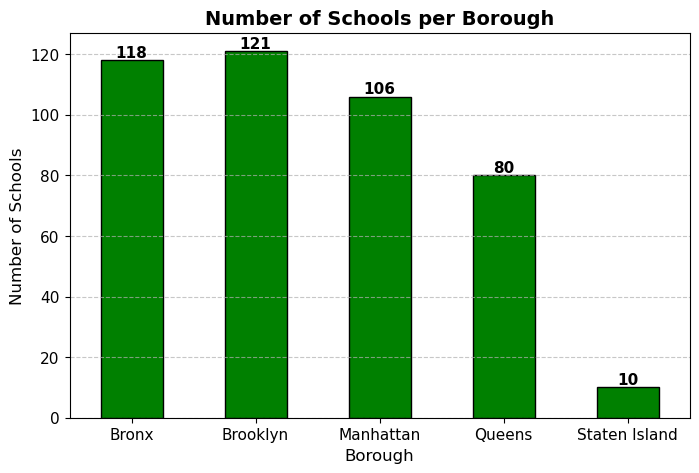

In [18]:
import matplotlib.pyplot as plt

ax = schools_per_borough.plot(
    kind="bar",
    figsize=(8,5),
    color="green",       # 🌱 all bars green
    edgecolor="black"    # black border for clarity
)

# Title & labels
plt.title("Number of Schools per Borough", fontsize=14, fontweight="bold")
plt.ylabel("Number of Schools", fontsize=12)
plt.xlabel("Borough", fontsize=12)

# Rotate x labels if needed
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Add values on top of bars
for i, v in enumerate(schools_per_borough):
    ax.text(i, v + 1, str(v), ha="center", fontsize=11, fontweight="bold")

# Grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Insight

1.Brooklyn has the most schools (about 121), which shows it has a big student population.

2.Many schools in Brooklyn include Grade 9, meaning there are a lot of high schools or schools that cover both middle and high school.

3.The average school size is not the same in every borough. For example, Queens schools often have more students compared to schools in Brooklyn or Manhattan.